In [1]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.style as style
import networkx as nx
import matplotlib.pyplot as plt
import Core
import analysis_utils as au

from scipy import stats
from plotly import tools
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math, Latex

InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
TRACE_RAW_DRD87 = "/Users/saveliyyusufov/Hen_Lab/Mice/drd87_experiments/Raw_EPM_drd87.csv"
data = pd.read_csv(TRACE_RAW_DRD87, header=None)

z_scored_dataframe, AUC_dataframe, cell_transients_dataframe = Core.detect_ca_transients_mossy(data, 2, 0.5, 0.2, 10)

z_scored_dataframe.columns = ["neuron" + str(i) for i in range(1, len(z_scored_dataframe.columns)+1)]
AUC_dataframe.columns = ["neuron" + str(i) for i in range(1, len(AUC_dataframe.columns)+1)]
cell_transients_dataframe.columns = [i for i in range(1, len(cell_transients_dataframe.columns)+1)]

In [3]:
correlated_pairs_dict = dict()

# Find and all pairs of neurons that have a specified correlation and return a nested dictionary of them
COR_VAL = 0.3
corr_pairs_of_neurons = 0
columns = cell_transients_dataframe.columns.tolist()
for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
        r_value = np.corrcoef(cell_transients_dataframe[columns[i]], cell_transients_dataframe[columns[j]])[0][1]
        if abs(r_value) >= COR_VAL:
            corr_pairs_of_neurons += 1
            if columns[i] not in correlated_pairs_dict:
                correlated_pairs_dict[columns[i]] = {columns[j]:r_value}
            else: 
                correlated_pairs_dict[columns[i]][columns[j]] = r_value

print("There are {} correlated pairs of neurons".format(corr_pairs_of_neurons))

There are 92 correlated pairs of neurons


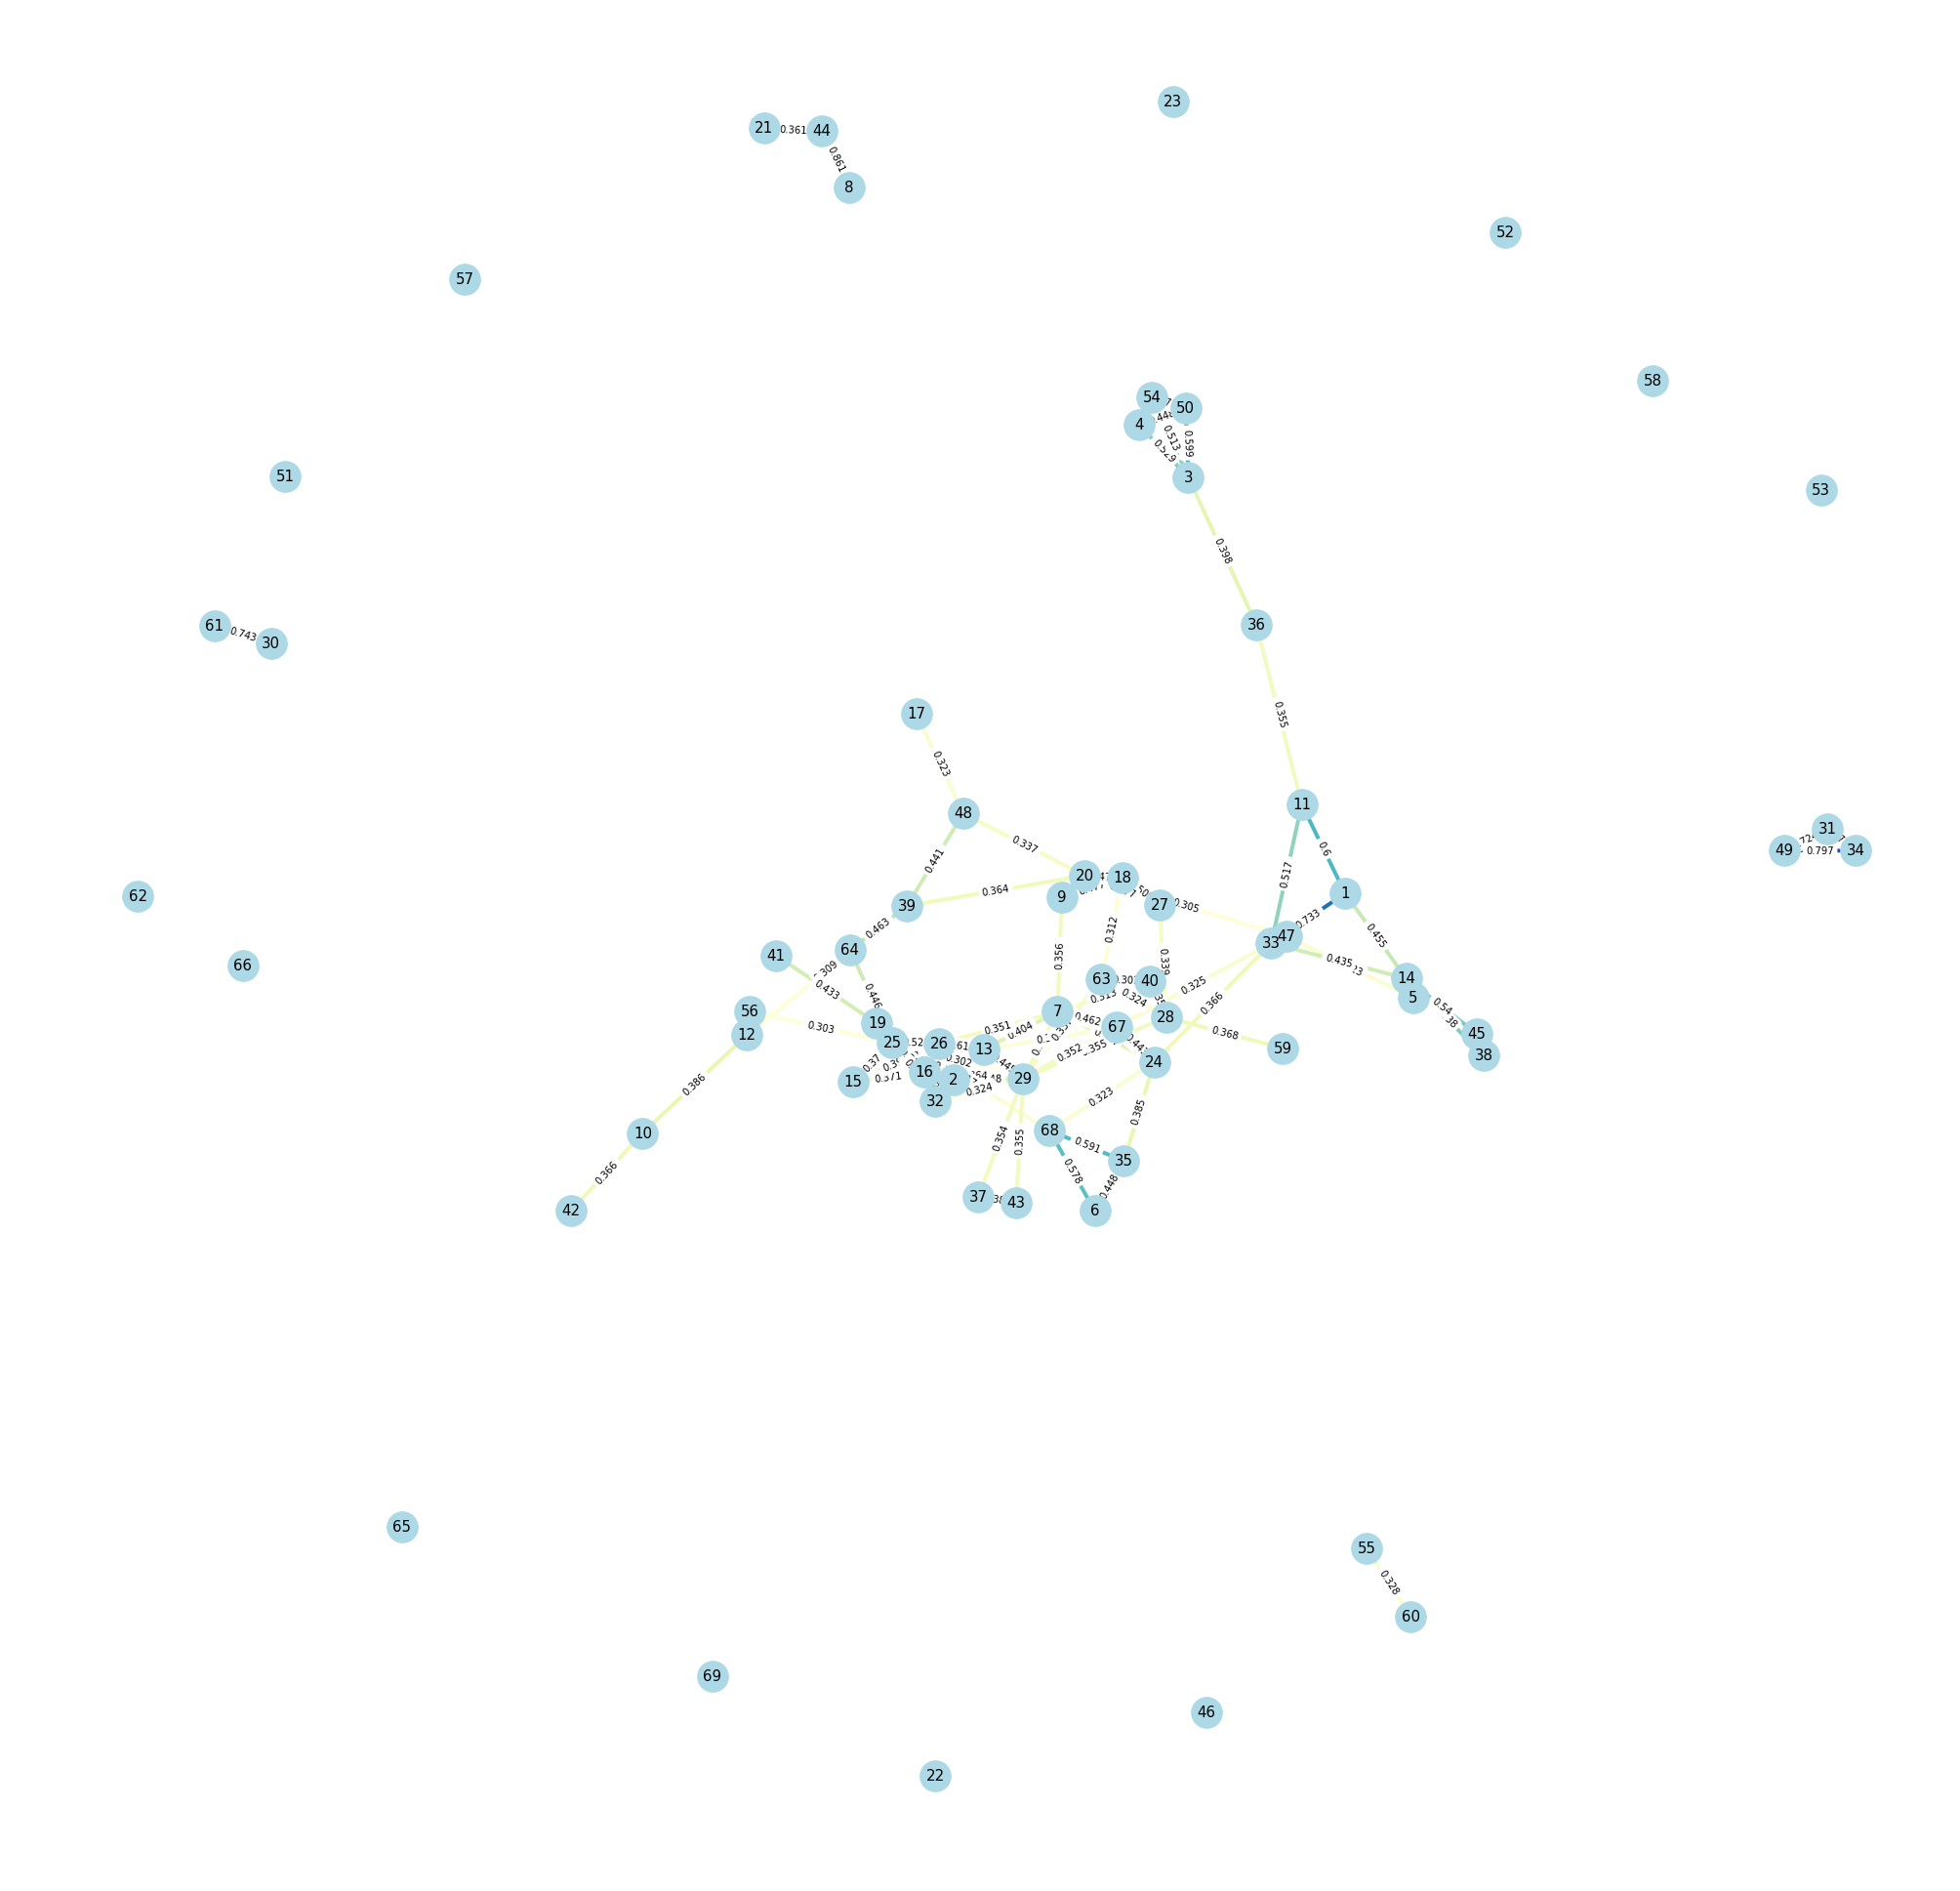

In [4]:
G = nx.Graph()

G.add_nodes_from(cell_transients_dataframe.columns)

for key in correlated_pairs_dict:
    for inner_key in correlated_pairs_dict[key]:
        G.add_edge(key, inner_key, weight=round(correlated_pairs_dict[key][inner_key], 3))
        
# positions for all nodes
pos = nx.spring_layout(G, weight='weight') 

plt.figure(figsize=(35, 35))

# nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue');

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

# edges
nx.draw_networkx_edges(G, pos, width=4.0, edge_color=weights, edge_cmap=plt.cm.YlGnBu);

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# labels
nx.draw_networkx_labels(G, pos, font_size=15, edge_labels=labels)

plt.axis('off');
plt.savefig("drd87_Network_Graph.png", format="PNG")
plt.show();

In [5]:
degrees = G.degree()
degrees
degrees = dict(degrees)
max(degrees, key=degrees.get)

DegreeView({1: 3, 2: 6, 3: 4, 4: 3, 5: 1, 6: 2, 7: 7, 8: 1, 9: 2, 10: 2, 11: 3, 12: 2, 13: 8, 14: 4, 15: 3, 16: 7, 17: 1, 18: 4, 19: 2, 20: 5, 21: 1, 22: 0, 23: 0, 24: 5, 25: 9, 26: 7, 27: 3, 28: 5, 29: 11, 30: 1, 31: 2, 32: 6, 33: 5, 34: 2, 35: 3, 36: 2, 37: 2, 38: 2, 39: 4, 40: 3, 41: 1, 42: 1, 43: 2, 44: 2, 45: 2, 46: 0, 47: 2, 48: 3, 49: 2, 50: 3, 51: 0, 52: 0, 53: 0, 54: 3, 55: 1, 56: 1, 57: 0, 58: 0, 59: 1, 60: 1, 61: 1, 62: 0, 63: 4, 64: 2, 65: 0, 66: 0, 67: 5, 68: 4, 69: 0})

29

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



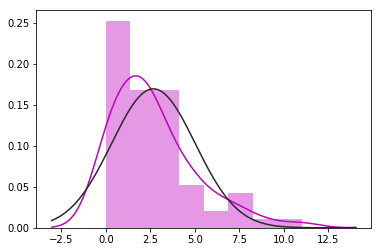

In [9]:
sns.distplot(list(degrees.values()), color='m', fit=stats.norm)

In [7]:
# TODO: Fix this to use this to compute attenuation factor
# adj_matrix = nx.adj_matrix(G)
# np.linalg.eig(adj_matrix)

In [ ]:
centrality = nx.katz_centrality(G)

In [ ]:
for n, c in sorted(centrality.items()):
    print("{} {}".format(n, c))
    
max([c for n, c in sorted(centrality.items())])

In [ ]:
trace1 = go.Scatter(
    x = list(range(0, len(cell_transients_dataframe))),
    y = cell_transients_dataframe[29],
    name = 29
)

data = [trace1]
plotly.offline.iplot(data)